```
Copyright (C) 2024-2025 Yucheng Liu. Under the GNU AGPL 3.0 License.
GNU AGPL 3.0 License: https://www.gnu.org/licenses/agpl-3.0.txt .

Copyright (C) 2024-2025 Yucheng Liu. Under the CC-BY-SA 4.0 License.
CC-BY-SA 4.0 License: https://creativecommons.org/licenses/by-sa/4.0/legalcode.txt .
```

# 4.1. Analyzing All Users' Eye-gaze Angular Velocity Data

Analyzing all users' VR sickness vs. eye-gaze angular velocity data.

Note the following items.

- We need to run `./_0_1_Data_Shared_Prepare.ipynb` before running the below code blocks.
- Then, we need to run `./_4_0_Data_EyeGazeAngularVelocity_AllUsers_Prepare.ipynb` before running the below code blocks.

Read the following comphensive (with-sickness and without-sickness) data files from the `./_4_Data_EyeGazeAngularVelocity_AllUsers` folder.

- Read `AllUsers_Time.json` and convert its contents to a `Items_Time` list `[]`.
- Read `AllUsers_EyeGazeAngularVelocity.json` and convert its contents to a `Items_EyeGazeAngularVelocity` list `[]`.
- Read `AllUsers_Sickness.json` and convert its contents to a `Items_Sickness` list `[]`.
  - Create a copy of `Items_Sickness` called `Items_Sickness_Categories` and convert all its values to `str` categories.

Read the following with-sickness data files from the `./_4_Data_EyeGazeAngularVelocity_AllUsers` folder.

- Read `AllUsers_WithSickness_Time.json` and convert its contents to a `Items_WithSickness_Time` list `[]`.
- Read `AllUsers_WithSickness_EyeGazeAngularVelocity.json` and convert its contents to a `Items_WithSickness_EyeGazeAngularVelocity` list `[]`.
- Read `AllUsers_WithSickness_Sickness.json` and convert its contents to a `Items_WithSickness_Sickness` list `[]`.
  - Create a copy of `Items_WithSickness_Sickness` called `Items_WithSickness_Sickness_Categories` and convert all its values to `str` categories.

In [1]:
import os
import json
import pandas

Path_Self = os.path.abspath(os.path.curdir)
Path_Input = os.path.join(Path_Self, "_4_Data_EyeGazeAngularVelocity_AllUsers")
Path_Input_Time = os.path.join(Path_Input, "AllUsers_Time.json")
Path_Input_EyeGazeAngularVelocity = os.path.join(Path_Input, "AllUsers_EyeGazeAngularVelocity.json")
Path_Input_Sickness = os.path.join(Path_Input, "AllUsers_Sickness.json")
Path_Input_WithSickness_Time = os.path.join(Path_Input, "AllUsers_WithSickness_Time.json")
Path_Input_WithSickness_EyeGazeAngularVelocity = os.path.join(Path_Input, "AllUsers_WithSickness_EyeGazeAngularVelocity.json")
Path_Input_WithSickness_Sickness = os.path.join(Path_Input, "AllUsers_WithSickness_Sickness.json")
Path_Output = os.path.join(Path_Self, f"Figures_Computed")
Path_Output_Users = os.path.join(Path_Output, f"AllUsers")
os.makedirs(Path_Output_Users, exist_ok=True)

def Path_Output_Figure_Find(Path_):
    return os.path.join(Path_Output_Users, Path_)
# end def

Items_Time = []
Items_EyeGazeAngularVelocity = []
Items_Sickness = []
Items_WithSickness_Time = []
Items_WithSickness_EyeGazeAngularVelocity = []
Items_WithSickness_Sickness = []

Paths_AndItems = [
    (Path_Input_Time, Items_Time),
    (Path_Input_EyeGazeAngularVelocity, Items_EyeGazeAngularVelocity),
    (Path_Input_Sickness, Items_Sickness),
    (Path_Input_WithSickness_Time, Items_WithSickness_Time),
    (Path_Input_WithSickness_EyeGazeAngularVelocity, Items_WithSickness_EyeGazeAngularVelocity),
    (Path_Input_WithSickness_Sickness, Items_WithSickness_Sickness),
]

for Index, (Path_, Items) in enumerate(Paths_AndItems):
    with open(Path_, "r") as File_:
        print(f"Begin reading file {Index + 1} / {len(Paths_AndItems)}")
        Items[:] = json.load(File_)
        Items[:] = list(Items)
        print(f"End reading file {Index + 1} / {len(Paths_AndItems)}")
    # end with
# end for

Items_Sickness_Categories = []
Items_WithSickness_Sickness_Categories = []

for Index, Item in enumerate(Items_Sickness):
    Sickness_Category = str(int(Item))
    Items_Sickness_Categories.append(Sickness_Category)
# end

for Index, Item in enumerate(Items_WithSickness_Sickness):
    Sickness_Category = str(int(Item))
    Items_WithSickness_Sickness_Categories.append(Sickness_Category)
# end

Data_ = pandas.DataFrame({
    "Time": Items_Time,
    "EyeGazeAngularVelocity": Items_EyeGazeAngularVelocity,
    "Sickness": Items_Sickness,
    "SicknessCategory": Items_Sickness_Categories,
})

print(
    "Begin Data_\n"
    + str(Data_.describe())
    + "\nEnd Data_"
)

Data_WithSickness = pandas.DataFrame({
    "Time": Items_WithSickness_Time,
    "EyeGazeAngularVelocity": Items_WithSickness_EyeGazeAngularVelocity,
    "Sickness": Items_WithSickness_Sickness,
    "SicknessCategory": Items_WithSickness_Sickness_Categories,
})

print(
    "Begin Data_WithSickness\n"
    + str(Data_WithSickness.describe())
    + "\nEnd Data_WithSickness"
)


Begin reading file 1 / 6
End reading file 1 / 6
Begin reading file 2 / 6
End reading file 2 / 6
Begin reading file 3 / 6
End reading file 3 / 6
Begin reading file 4 / 6
End reading file 4 / 6
Begin reading file 5 / 6
End reading file 5 / 6
Begin reading file 6 / 6
End reading file 6 / 6
Begin Data_
               Time  EyeGazeAngularVelocity     Sickness
count  24221.000000            24221.000000  24221.00000
mean     515.953300               29.781576      0.13191
std      295.739892               52.684620      0.33840
min        0.000000                0.000000      0.00000
25%      261.294470                3.055994      0.00000
50%      516.238914                9.755603      0.00000
75%      771.772266               30.034681      0.00000
max     1024.911156              815.452087      1.00000
End Data_
Begin Data_WithSickness
              Time  EyeGazeAngularVelocity     Sickness
count  6521.000000             6521.000000  6521.000000
mean    139.706203               38.85807

Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of `Items_AngularVelocity`.

In [2]:
import pandas

print("All users' Eye-gaze Angular Velocity Descriptive Statistics")

Data_["EyeGazeAngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All users' Eye-gaze Angular Velocity Descriptive Statistics


count    24221.000000
mean        29.781576
std         52.684620
min          0.000000
25%          3.055994
50%          9.755603
75%         30.034681
max        815.452087
Name: EyeGazeAngularVelocity, dtype: object

Note that we have to run all the above code blocks before running the below one.

Compute a graphical category plot of the `Items_EyeGazeAngularVelocity` data.

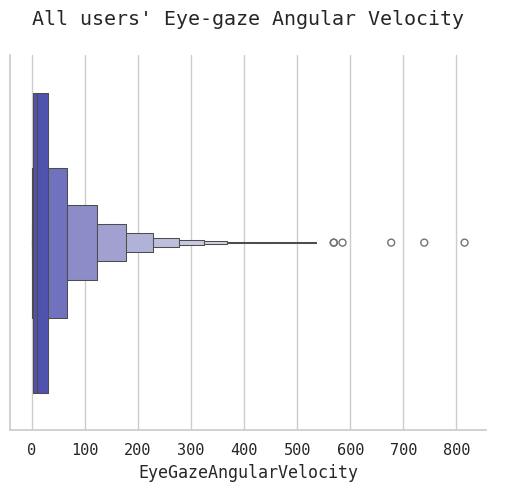

In [3]:
import seaborn
import matplotlib.pyplot as pyplot

ColorMap = seaborn.hls_palette(
    n_colors=6,
    h=0.83,
    l=0.50,
    s=0.50,
)

Palette_ = seaborn.color_palette(ColorMap)
Palette_.reverse()

seaborn.set_theme(
    context="notebook",
    style="whitegrid",
    palette=Palette_,
    font="monospace",
)

Plot = seaborn.catplot(
    data=Data_,
    x="EyeGazeAngularVelocity",
    kind="boxen",
    native_scale=True,
)

Plot.figure.suptitle("All users' Eye-gaze Angular Velocity")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_Stats.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of the `Items_EyeGazeAngularVelocity` vs `Items_Sickness_Categories[*] == "0"` data.

In [4]:
import pandas

Data_Sickness0 = Data_[Data_["SicknessCategory"] == "0"]

print("All users' Eye-gaze Angular Velocity (When Sickness is 0) Descriptive Statistics")

Data_Sickness0["EyeGazeAngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All users' Eye-gaze Angular Velocity (When Sickness is 0) Descriptive Statistics


count    21026.000000
mean        28.651676
std         51.618400
min          0.000000
25%          2.816418
50%          8.996890
75%         28.725114
max        815.452087
Name: EyeGazeAngularVelocity, dtype: object

Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of the `Items_EyeGazeAngularVelocity` vs `Items_Sickness_Categories[*] == "1"` data.

In [5]:
import pandas

Data_Sickness1 = Data_[Data_["SicknessCategory"] == "1"]

print("All users' Eye-gaze Angular Velocity (When Sickness is 1) Descriptive Statistics")

Data_Sickness1["EyeGazeAngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All users' Eye-gaze Angular Velocity (When Sickness is 1) Descriptive Statistics


count    3195.000000
mean       37.217345
std        58.693120
min         0.000000
25%         5.998015
50%        16.238060
75%        37.148190
max       568.816711
Name: EyeGazeAngularVelocity, dtype: object

In [6]:
import statsmodels.stats.weightstats as StatsModels_WeightStats

CompareMeans = StatsModels_WeightStats.CompareMeans(
    StatsModels_WeightStats.DescrStatsW(Data_Sickness0["EyeGazeAngularVelocity"]),
    StatsModels_WeightStats.DescrStatsW(Data_Sickness1["EyeGazeAngularVelocity"]),
)

print(
    f"All Users' Eye-gaze Angular Velocity\n"
    + "[When Sickness == 0 vs. When Sickness == 1]\n"
    + "Compare Means Statistical Tests"
)

print(
    CompareMeans.summary(
        use_t=True,
        alpha=0.05,
        usevar="unequal",
        value=0.0
    )
)


All Users' Eye-gaze Angular Velocity
[When Sickness == 0 vs. When Sickness == 1]
Compare Means Statistical Tests
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -8.5657      1.098     -7.803      0.000     -10.718      -6.414


Note that we have to run all the above code blocks before running the below one.

Compute a graphical category plot of the `Items_EyeGazeAngularVelocity` vs `Items_Sickness_Categories` data.

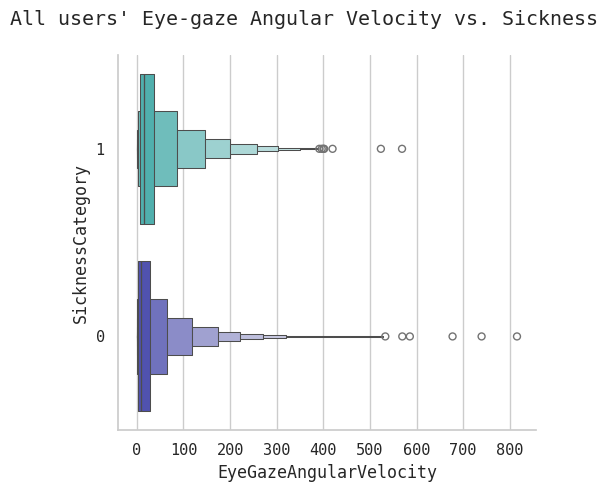

In [7]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.catplot(
    data=Data_,
    x="EyeGazeAngularVelocity",
    y="SicknessCategory",
    hue="SicknessCategory",
    kind="boxen",
    order=["1", "0"],
    native_scale=True,
)

Plot.figure.suptitle("All users' Eye-gaze Angular Velocity vs. Sickness")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_VSSick_Stats.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute a graphical line plot of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` comprehensive (with-sickness and without-sickness) data.

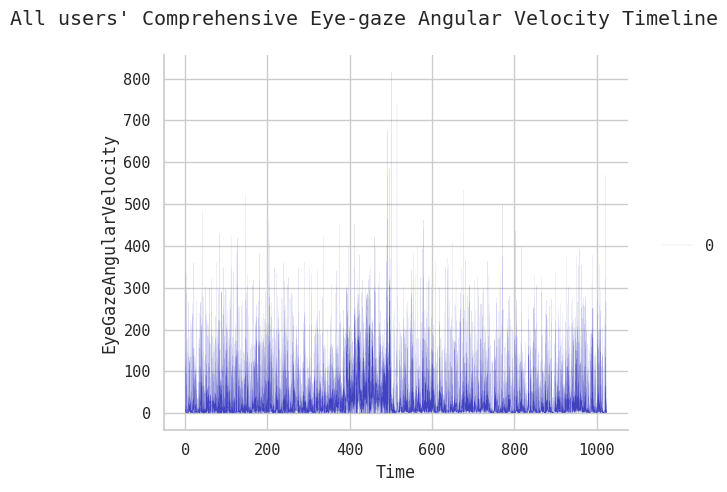

In [8]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_,
    x="Time",
    y="EyeGazeAngularVelocity",
    size=0,
    sizes=[0.05],
    kind="line",
)

Plot.figure.suptitle("All users' Comprehensive Eye-gaze Angular Velocity Timeline")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_Time_Comp.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute a graphical line plot of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` with-sickness data.

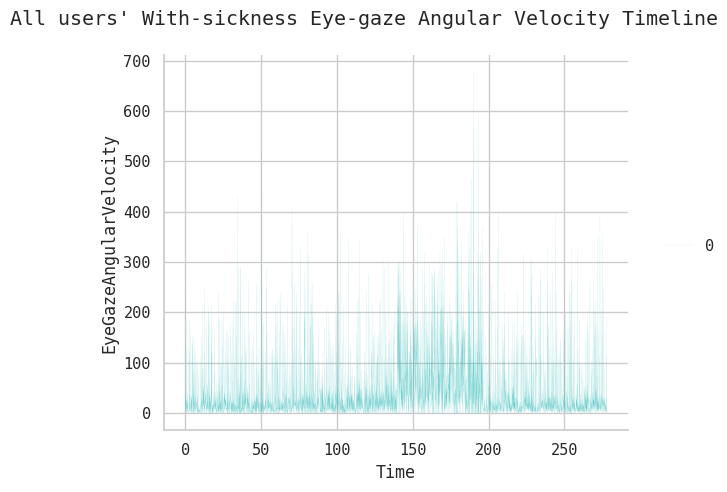

In [9]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_WithSickness,
    x="Time",
    y="EyeGazeAngularVelocity",
    hue=0,
    palette=[Palette_[1]],
    size=0,
    sizes=[0.05],
    kind="line",
)

Plot.figure.suptitle("All users' With-sickness Eye-gaze Angular Velocity Timeline")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_Time_WSick.png"),
    dpi=Plot.figure.dpi,
)

Note that we have to run all the above code blocks before running the below one.

Compute a graphical line plot of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` without-sickness data.

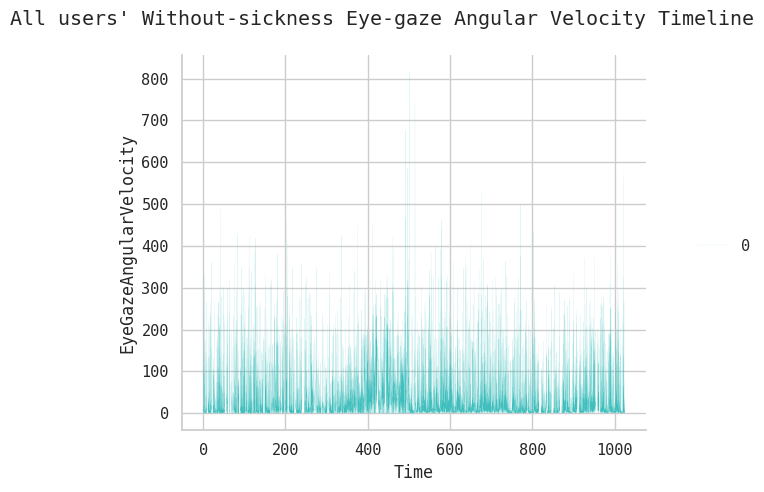

In [10]:
import seaborn
import matplotlib.pyplot as pyplot

Data_WithoutSickness = Data_Sickness0

Plot = seaborn.relplot(
    data=Data_WithoutSickness,
    x="Time",
    y="EyeGazeAngularVelocity",
    hue=0,
    palette=[Palette_[1]],
    size=0,
    sizes=[0.05],
    kind="line",
)

Plot.figure.suptitle("All users' Without-sickness Eye-gaze Angular Velocity Timeline")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_Time_WOSick.png"),
    dpi=Plot.figure.dpi,
)

Note that we have to run all the above code blocks before running the below one.

Compute textual and graphical least square spectual analyses info of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` comprehensive (with-sickness and without-sickness) data.

- We can deem the least square spectual analyses as a kind of discrete Fourier transform analyses designed for time-series data with uneven time-steps.

All users' Comprehensive Eye-gaze Angular Velocity
Least Square Spectual Analyses
Frequency		Amplitude		Phase
0.500000		0.976935		-2.605527
1.000000		0.048945		115.421107
1.500000		1.099232		-28.025741
2.000000		0.656971		1.533761
2.500000		0.155913		28.411565
3.000000		0.790545		166.019201
3.500000		0.435995		-94.578650
4.000000		0.764952		-126.529043
4.500000		0.272043		-50.022421
5.000000		0.760168		-73.882960
5.500000		0.309386		-69.524214
6.000000		0.193912		-160.109948
6.500000		0.630329		-79.304238
7.000000		0.924989		-133.675908
7.500000		0.249845		-102.922444
8.000000		0.686820		20.494274
8.500000		0.623573		-175.935140
9.000000		0.912372		79.138453
9.500000		0.268978		38.857611
10.000000		0.402728		-14.366682
10.500000		0.741028		-33.869579
11.000000		0.738918		98.834271
11.500000		0.312519		31.702856
12.000000		1.105225		10.932806
12.500000		0.094360		-9.497770
13.000000		0.640781		119.836515
13.500000		0.386521		63.400668
14.000000		0.179828		-72.552622
14.500000		1.079371	

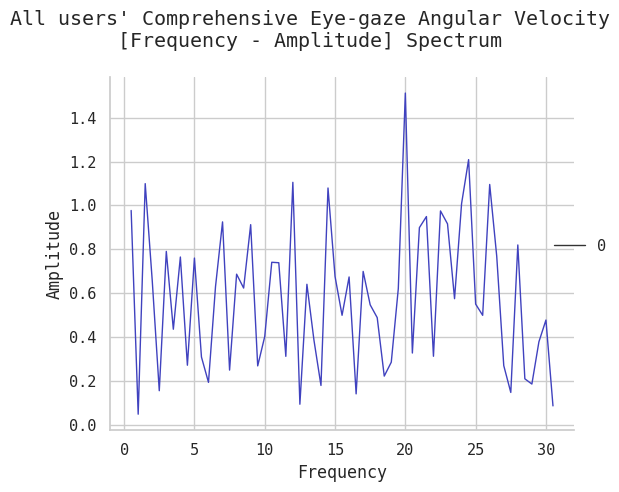

In [11]:
import numpy
import scipy.signal as signal
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Frequencies = numpy.linspace(
    start=0.5,
    stop=30.5,
    num=60 + 1,
    endpoint=True,
)

Periodogram = signal.lombscargle(
    x=Data_["Time"],
    y=Data_["EyeGazeAngularVelocity"],
    freqs=Frequencies,
    normalize="amplitude",
    floating_mean=True,
)

Amplitudes = []
Phases = []

for Index, (Frequency, Period) in enumerate(zip(Frequencies, Periodogram)):
    Amplitude = numpy.abs(Period)
    Phase = numpy.angle(Period, deg=True)
    Amplitudes.append(Amplitude)
    Phases.append(Phase)
# end for

print(
    "All users' Comprehensive Eye-gaze Angular Velocity\n"
    + "Least Square Spectual Analyses"
)

print("Frequency\t\tAmplitude\t\tPhase")

for Index, (Frequency, Amplitude, Phase) in enumerate(zip(Frequencies, Amplitudes, Phases)):
    print(f"{Frequency:.6f}\t\t{Amplitude:.6f}\t\t{Phase:.6f}")
# end for

Data_Spectrum = pandas.DataFrame({
    "Frequency": Frequencies,
    "Amplitude": Amplitudes,
    "Phase": Phases,
})

Plot = seaborn.relplot(
    data=Data_Spectrum,
    x="Frequency",
    y="Amplitude",
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Comprehensive Eye-gaze Angular Velocity\n"
    + "[Frequency - Amplitude] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqAmp_Comp.png"),
    dpi=Plot.figure.dpi,
)

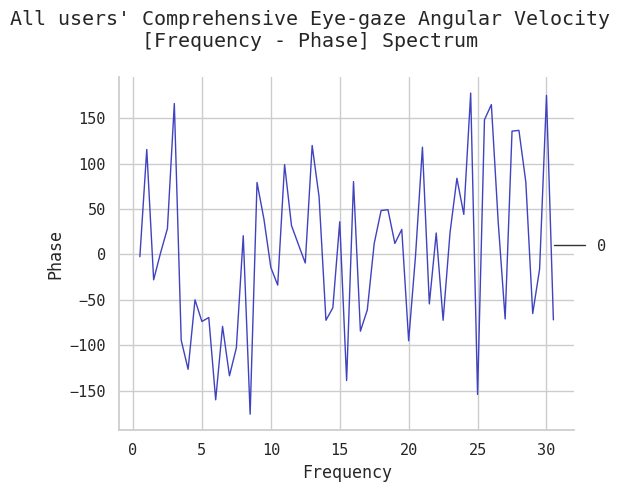

In [12]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_Spectrum,
    x="Frequency",
    y="Phase",
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Comprehensive Eye-gaze Angular Velocity\n"
    + "[Frequency - Phase] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqPh_Comp.png"),
    dpi=Plot.figure.dpi,
)

Note that we have to run all the above code blocks before running the below one.

Compute textual and graphical least square spectual analyses info of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` with-sickness data.

- We can deem the least square spectual analyses as a kind of discrete Fourier transform analyses designed for time-series data with uneven time-steps.

All users' With-sickness Eye-gaze Angular Velocity
Least Square Spectual Analyses
Frequency		Amplitude		Phase
0.500000		3.003199		92.206437
1.000000		2.057091		52.716819
1.500000		1.005731		-85.762497
2.000000		0.606290		-63.165635
2.500000		1.813558		-13.399996
3.000000		0.615412		-126.034188
3.500000		0.394661		112.517993
4.000000		1.488739		39.256985
4.500000		1.261012		-103.365109
5.000000		1.384474		-114.076174
5.500000		3.342807		26.966529
6.000000		0.471644		134.448160
6.500000		2.434628		-26.102525
7.000000		0.961602		60.517294
7.500000		0.425885		137.200997
8.000000		1.164797		-0.269682
8.500000		1.054799		56.622370
9.000000		1.278874		-174.446244
9.500000		0.912797		-130.738910
10.000000		0.402832		-141.177255
10.500000		1.402548		-37.627438
11.000000		0.435687		-62.747418
11.500000		0.529503		-144.217129
12.000000		1.212128		-34.919038
12.500000		1.624180		52.225837
13.000000		1.919596		-127.757121
13.500000		1.087362		-88.121411
14.000000		1.653527		59.794602
14.500000		0.7

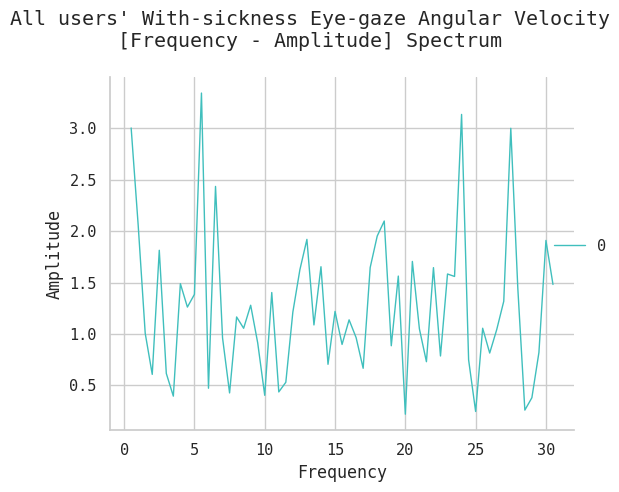

In [13]:
import numpy
import scipy.signal as signal
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Frequencies = numpy.linspace(
    start=0.5,
    stop=30.5,
    num=60 + 1,
    endpoint=True,
)

Periodogram = signal.lombscargle(
    x=Data_WithSickness["Time"],
    y=Data_WithSickness["EyeGazeAngularVelocity"],
    freqs=Frequencies,
    normalize="amplitude",
    floating_mean=True,
)

Amplitudes = []
Phases = []

for Index, (Frequency, Period) in enumerate(zip(Frequencies, Periodogram)):
    Amplitude = numpy.abs(Period)
    Phase = numpy.angle(Period, deg=True)
    Amplitudes.append(Amplitude)
    Phases.append(Phase)
# end for

print(
    "All users' With-sickness Eye-gaze Angular Velocity\n"
    + "Least Square Spectual Analyses"
)

print("Frequency\t\tAmplitude\t\tPhase")

for Index, (Frequency, Amplitude, Phase) in enumerate(zip(Frequencies, Amplitudes, Phases)):
    print(f"{Frequency:.6f}\t\t{Amplitude:.6f}\t\t{Phase:.6f}")
# end for

Data_WithSickness_Spectrum = pandas.DataFrame({
    "Frequency": Frequencies,
    "Amplitude": Amplitudes,
    "Phase": Phases,
})

Plot = seaborn.relplot(
    data=Data_WithSickness_Spectrum,
    x="Frequency",
    y="Amplitude",
    hue=0,
    palette=[Palette_[1]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' With-sickness Eye-gaze Angular Velocity\n"
    + "[Frequency - Amplitude] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqAmp_WSick.png"),
    dpi=Plot.figure.dpi,
)


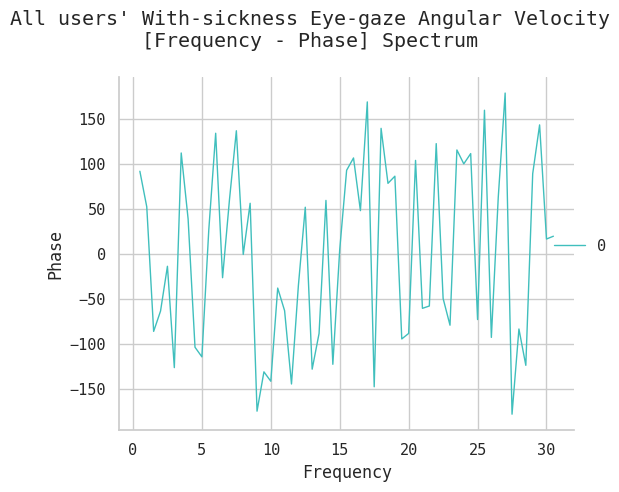

In [14]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_WithSickness_Spectrum,
    x="Frequency",
    y="Phase",
    hue=0,
    palette=[Palette_[1]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' With-sickness Eye-gaze Angular Velocity\n"
    + "[Frequency - Phase] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqPh_WSick.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual and graphical least square spectual analyses info of the `Items_Times` vs. `Items_EyeGazeAngularVelocity` without-sickness data.

- We can deem the least square spectual analyses as a kind of discrete Fourier transform analyses designed for time-series data with uneven time-steps.

All users' Without-sickness Eye-gaze Angular Velocity
Least Square Spectual Analyses
Frequency		Amplitude		Phase
0.500000		1.469646		-3.222886
1.000000		0.189353		21.805099
1.500000		0.982759		-33.391727
2.000000		0.885215		35.051794
2.500000		0.208318		21.112999
3.000000		0.679475		169.921673
3.500000		0.257778		-62.671822
4.000000		0.792897		-133.362532
4.500000		0.084095		-155.959382
5.000000		0.967247		-54.321490
5.500000		0.353416		-88.033752
6.000000		0.216688		120.263812
6.500000		0.902404		-78.140690
7.000000		0.914654		-127.524565
7.500000		0.312236		-174.535433
8.000000		1.147287		15.838505
8.500000		0.765340		-176.961041
9.000000		0.894886		83.853454
9.500000		0.237053		16.748481
10.000000		0.656069		-30.164990
10.500000		0.521649		-52.352568
11.000000		1.027561		106.225835
11.500000		0.211536		124.411507
12.000000		1.161733		22.185187
12.500000		0.173013		1.838523
13.000000		0.723692		101.779599
13.500000		0.610591		61.198899
14.000000		0.102788		170.844210
14.500000		1.222

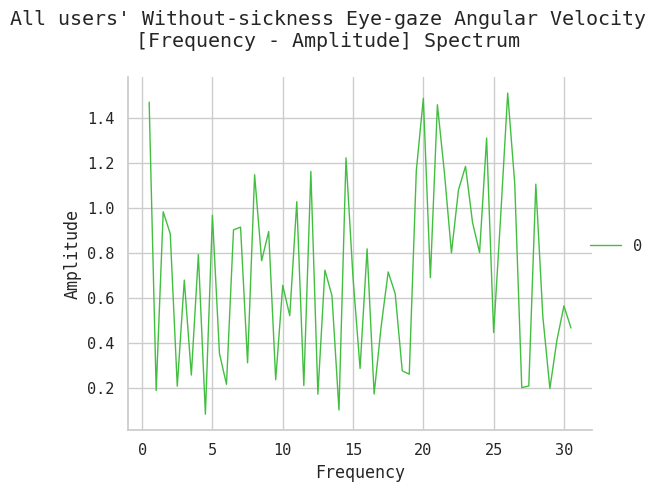

In [15]:
import numpy
import scipy.signal as signal
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Data_WithoutSickness = Data_Sickness0

Frequencies = numpy.linspace(
    start=0.5,
    stop=30.5,
    num=60 + 1,
    endpoint=True,
)

Periodogram = signal.lombscargle(
    x=Data_WithoutSickness["Time"],
    y=Data_WithoutSickness["EyeGazeAngularVelocity"],
    freqs=Frequencies,
    normalize="amplitude",
    floating_mean=True,
)

Amplitudes = []
Phases = []

for Index, (Frequency, Period) in enumerate(zip(Frequencies, Periodogram)):
    Amplitude = numpy.abs(Period)
    Phase = numpy.angle(Period, deg=True)
    Amplitudes.append(Amplitude)
    Phases.append(Phase)
# end for

print(
    "All users' Without-sickness Eye-gaze Angular Velocity\n"
    + "Least Square Spectual Analyses"
)

print("Frequency\t\tAmplitude\t\tPhase")

for Index, (Frequency, Amplitude, Phase) in enumerate(zip(Frequencies, Amplitudes, Phases)):
    print(f"{Frequency:.6f}\t\t{Amplitude:.6f}\t\t{Phase:.6f}")
# end for

Data_WithoutSickness_Spectrum = pandas.DataFrame({
    "Frequency": Frequencies,
    "Amplitude": Amplitudes,
    "Phase": Phases,
})

Plot = seaborn.relplot(
    data=Data_WithoutSickness_Spectrum,
    x="Frequency",
    y="Amplitude",
    hue=0,
    palette=[Palette_[2]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Without-sickness Eye-gaze Angular Velocity\n"
    + "[Frequency - Amplitude] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqAmp_WOSick.png"),
    dpi=Plot.figure.dpi,
)


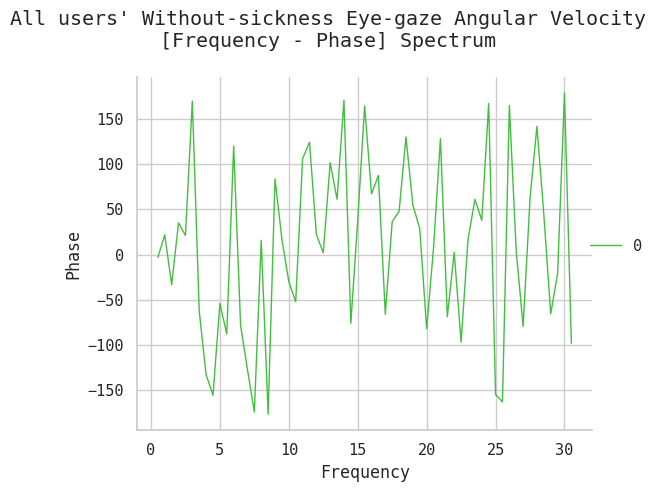

In [16]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_WithoutSickness_Spectrum,
    x="Frequency",
    y="Phase",
    hue=0,
    palette=[Palette_[2]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Without-sickness Eye-gaze Angular Velocity\n"
    + "[Frequency - Phase] Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqPh_WOSick.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual and graphical info of the differences between the comprehensive and with-sickness frequency spectrums.

All users' Eye-gaze Angular Velocity
[Comprehensive vs. With-sickness]
Differences in Least Square Spectual Analyses
Frequency		Difference_InAmplitude			Difference_InPhase
0.500000		2.026263			94.811964
1.000000		2.008146			62.704288
1.500000		0.093501			57.736756
2.000000		0.050681			64.699395
2.500000		1.657645			41.811560
3.000000		0.175133			292.053389
3.500000		0.041333			207.096643
4.000000		0.723787			165.786028
4.500000		0.988969			53.342688
5.000000		0.624307			40.193213
5.500000		3.033420			96.490743
6.000000		0.277732			294.558109
6.500000		1.804299			53.201714
7.000000		0.036613			194.193202
7.500000		0.176040			240.123441
8.000000		0.477977			20.763956
8.500000		0.431226			232.557510
9.000000		0.366502			253.584697
9.500000		0.643818			169.596521
10.000000		0.000104			126.810573
10.500000		0.661520			3.757859
11.000000		0.303231			161.581690
11.500000		0.216984			175.919984
12.000000		0.106904			45.851844
12.500000		1.529819			61.723606
13.000000		1.278815			247.593637
13.

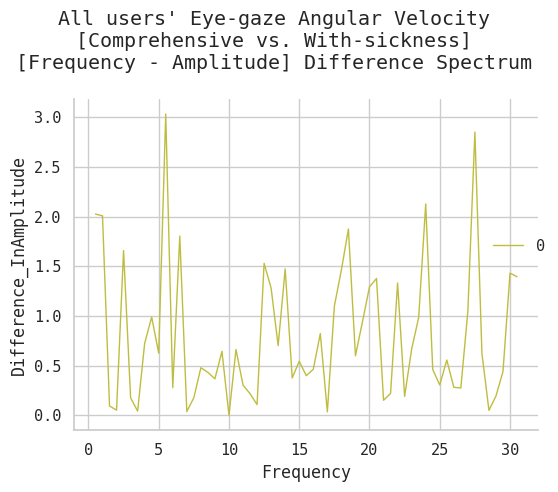

In [17]:
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Data_Diff_Spectrum = pandas.DataFrame({
    "Frequency": Data_Spectrum["Frequency"],
    "Difference_InAmplitude": numpy.abs(Data_WithSickness_Spectrum["Amplitude"] - Data_Spectrum["Amplitude"]),
    "Difference_InPhase": numpy.abs(Data_WithSickness_Spectrum["Phase"] - Data_Spectrum["Phase"]),
})

print(
    "All users' Eye-gaze Angular Velocity\n"
    + "[Comprehensive vs. With-sickness]\n"
    + "Differences in Least Square Spectual Analyses"
)

print("Frequency\t\tDifference_InAmplitude\t\t\tDifference_InPhase")

for Index, (Frequency, Diff_InAmplitude, Diff_InPhase) \
    in enumerate(zip(
        Data_Diff_Spectrum["Frequency"],
        Data_Diff_Spectrum["Difference_InAmplitude"],
        Data_Diff_Spectrum["Difference_InPhase"],
    )):
    print(f"{Frequency:.6f}\t\t{Diff_InAmplitude:.6f}\t\t\t{Diff_InPhase:.6f}")
# end for

Plot = seaborn.relplot(
    data=Data_Diff_Spectrum,
    x="Frequency",
    y="Difference_InAmplitude",
    hue=0,
    palette=[Palette_[3]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Eye-gaze Angular Velocity\n"
    + "[Comprehensive vs. With-sickness]\n"
    + "[Frequency - Amplitude] Difference Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqAmp_Diff_CompWSick.png"),
    dpi=Plot.figure.dpi,
)


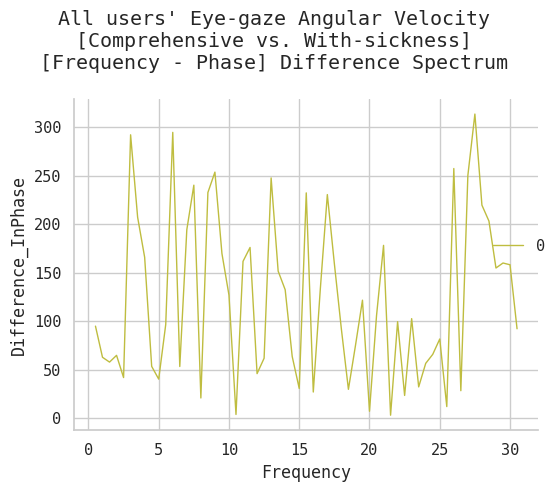

In [18]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_Diff_Spectrum,
    x="Frequency",
    y="Difference_InPhase",
    hue=0,
    palette=[Palette_[3]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Eye-gaze Angular Velocity\n"
    + "[Comprehensive vs. With-sickness]\n"
    + "[Frequency - Phase] Difference Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqPh_Diff_CompWSick.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual and graphical info of the differences between the with-sickness and without-sickness frequency spectrums.

All users' Eye-gaze Angular Velocity
[Comprehensive vs. With-sickness]
Differences in Least Square Spectual Analyses
Frequency		Difference_InAmplitude			Difference_InPhase
0.500000		1.533553			95.429323
1.000000		1.867737			30.911720
1.500000		0.022972			52.370770
2.000000		0.278925			98.217429
2.500000		1.605240			34.512995
3.000000		0.064063			295.955861
3.500000		0.136883			175.189816
4.000000		0.695843			172.619517
4.500000		1.176917			52.594274
5.000000		0.417228			59.754683
5.500000		2.989391			115.000281
6.000000		0.254956			14.184348
6.500000		1.532224			52.038165
7.000000		0.046948			188.041860
7.500000		0.113649			311.736430
8.000000		0.017510			16.108187
8.500000		0.289459			233.583410
9.000000		0.383988			258.299698
9.500000		0.675744			147.487391
10.000000		0.253237			111.012265
10.500000		0.880899			14.725130
11.000000		0.591874			168.973254
11.500000		0.317967			268.628636
12.000000		0.050396			57.104225
12.500000		1.451167			50.387314
13.000000		1.195904			229.536720
13

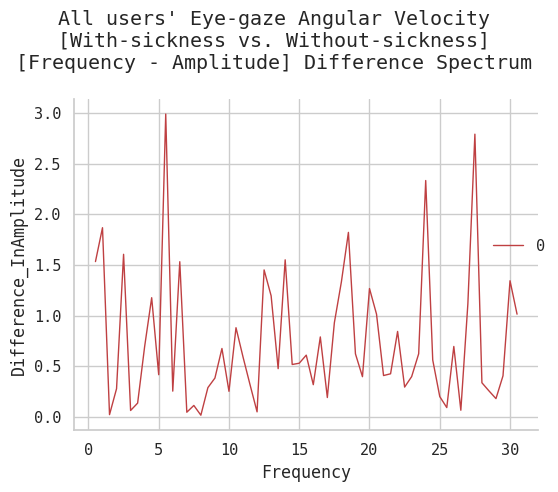

In [19]:
import pandas
import seaborn
import matplotlib.pyplot as pyplot

Data_Diff_Spectrum = pandas.DataFrame({
    "Frequency": Data_Spectrum["Frequency"],
    
    "Difference_InAmplitude"\
    : numpy.abs(Data_WithSickness_Spectrum["Amplitude"] - Data_WithoutSickness_Spectrum["Amplitude"]),
    
    "Difference_InPhase"\
    : numpy.abs(Data_WithSickness_Spectrum["Phase"] - Data_WithoutSickness_Spectrum["Phase"]),
})

print(
    "All users' Eye-gaze Angular Velocity\n"
    + "[Comprehensive vs. With-sickness]\n"
    + "Differences in Least Square Spectual Analyses"
)

print("Frequency\t\tDifference_InAmplitude\t\t\tDifference_InPhase")

for Index, (Frequency, Diff_InAmplitude, Diff_InPhase) \
    in enumerate(zip(
        Data_Diff_Spectrum["Frequency"],
        Data_Diff_Spectrum["Difference_InAmplitude"],
        Data_Diff_Spectrum["Difference_InPhase"],
    )):
    print(f"{Frequency:.6f}\t\t{Diff_InAmplitude:.6f}\t\t\t{Diff_InPhase:.6f}")
# end for

Plot = seaborn.relplot(
    data=Data_Diff_Spectrum,
    x="Frequency",
    y="Difference_InAmplitude",
    hue=0,
    palette=[Palette_[4]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Eye-gaze Angular Velocity\n"
    + "[With-sickness vs. Without-sickness]\n"
    + "[Frequency - Amplitude] Difference Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqAmp_Diff_WWOSick.png"),
    dpi=Plot.figure.dpi,
)

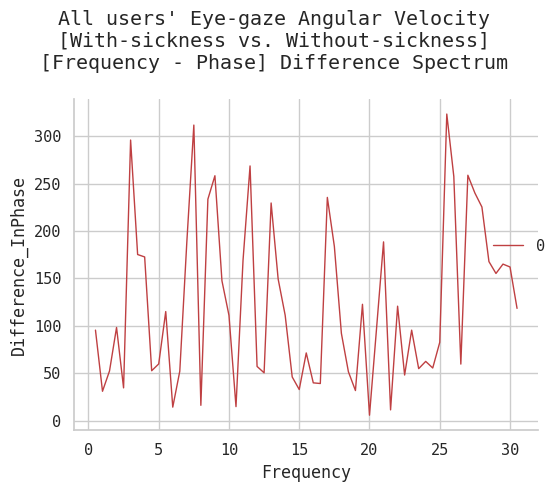

In [20]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.relplot(
    data=Data_Diff_Spectrum,
    x="Frequency",
    y="Difference_InPhase",
    hue=0,
    palette=[Palette_[4]],
    size=0,
    sizes=[1],
    kind="line",
)

Plot.figure.suptitle(
    "All users' Eye-gaze Angular Velocity\n"
    + "[With-sickness vs. Without-sickness]\n"
    + "[Frequency - Phase] Difference Spectrum"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_EyesAngVel_FreqPh_Diff_WWOSick.png"),
    dpi=Plot.figure.dpi,
)


## Congrats! 

We have completed this `ipynb` notebook.